In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os

folder_path = '"C:/Users/jash1/Desktop/datathon2.0/fruit"'  # Change this to the actual path of your 'fruit' folder

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.13.0


In [3]:
from pathlib import Path
import pandas as pd

def image_processing(filepath):
    """Create a DataFrame with the filepath and the labels of the pictures."""
    
    # Check if filepath is empty
    if not filepath:
        print("Error: Empty filepath list.")
        return pd.DataFrame()  # Return an empty DataFrame
    
    # Extract labels from file paths
    labels = []

    for path in filepath:
        try:
            label = str(path).split("/")[-2] if "/" in str(path) else str(path).split("\\")[-2]
            labels.append(label)
        except IndexError as e:
            print(f"Warning: IndexError for filepath: {path}. Skipping this file.")
            print("Exception:", e)
            print("File path causing the issue:", path)

    # Check if the lengths of filepath and labels match
    if len(filepath) != len(labels):
        print("Error: Length mismatch between filepath and labels.")
        return pd.DataFrame()  # Return an empty DataFrame
    
    # Create DataFrame with file paths and labels
    df = pd.DataFrame({'Filepath': filepath, 'Label': labels})

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

# Specify the directory path for training images
train_dir = Path('fruit/train')
print("Train Directory:", train_dir)

# Use the glob method to find all files with the extension .jpg recursively in the specified directory
train_filepaths = list(train_dir.glob('**/*.jpg'))
print("Train Filepaths:", train_filepaths)

# Process the training data
train_df = image_processing(train_filepaths)


Train Directory: fruit\train
Train Filepaths: [WindowsPath('fruit/train/apple/Image_1.jpg'), WindowsPath('fruit/train/apple/Image_10.jpg'), WindowsPath('fruit/train/apple/Image_16.jpg'), WindowsPath('fruit/train/apple/Image_17.jpg'), WindowsPath('fruit/train/apple/Image_18.jpg'), WindowsPath('fruit/train/apple/Image_19.jpg'), WindowsPath('fruit/train/apple/Image_2.jpg'), WindowsPath('fruit/train/apple/Image_20.jpg'), WindowsPath('fruit/train/apple/Image_21.jpg'), WindowsPath('fruit/train/apple/Image_23.jpg'), WindowsPath('fruit/train/apple/Image_24.jpg'), WindowsPath('fruit/train/apple/Image_25.jpg'), WindowsPath('fruit/train/apple/Image_26.jpg'), WindowsPath('fruit/train/apple/Image_27.jpg'), WindowsPath('fruit/train/apple/Image_28.jpg'), WindowsPath('fruit/train/apple/Image_3.jpg'), WindowsPath('fruit/train/apple/Image_31.jpg'), WindowsPath('fruit/train/apple/Image_32.jpg'), WindowsPath('fruit/train/apple/Image_33.jpg'), WindowsPath('fruit/train/apple/Image_34.jpg'), WindowsPath('fru

In [4]:
val_dir = Path('fruit/validation')  # Adjust the path based on your validation directory
print("Validation Directory:", val_dir)

val_filepaths = list(val_dir.glob('**/*.jpg'))
print("Validation Filepaths:", val_filepaths)

val_df = image_processing(val_filepaths)


Validation Directory: fruit\validation
Validation Filepaths: [WindowsPath('fruit/validation/apple/Image_1.jpg'), WindowsPath('fruit/validation/apple/Image_10.jpg'), WindowsPath('fruit/validation/apple/Image_2.jpg'), WindowsPath('fruit/validation/apple/Image_3.jpg'), WindowsPath('fruit/validation/apple/Image_4.jpg'), WindowsPath('fruit/validation/apple/Image_5.jpg'), WindowsPath('fruit/validation/apple/Image_6.JPG'), WindowsPath('fruit/validation/apple/Image_7.jpg'), WindowsPath('fruit/validation/apple/Image_8.jpg'), WindowsPath('fruit/validation/apple/Image_9.jpg'), WindowsPath('fruit/validation/banana/Image_1.jpg'), WindowsPath('fruit/validation/banana/Image_10.jpg'), WindowsPath('fruit/validation/banana/Image_2.jpg'), WindowsPath('fruit/validation/banana/Image_3.jpg'), WindowsPath('fruit/validation/banana/Image_4.jpg'), WindowsPath('fruit/validation/banana/Image_5.jpg'), WindowsPath('fruit/validation/banana/Image_6.jpg'), WindowsPath('fruit/validation/banana/Image_8.jpg'), WindowsPat

In [5]:
# Specify the directory path for test images
test_dir = Path('fruit/test')
print("Test Directory:", test_dir)

# Use the glob method to find all files with the extension .jpg recursively in the specified directory
test_filepaths = list(test_dir.glob('**/*.jpg'))
print("Test Filepaths:", test_filepaths)

# Process the test data
test_df = image_processing(test_filepaths)


Test Directory: fruit\test
Test Filepaths: [WindowsPath('fruit/test/apple/Image_1.jpg'), WindowsPath('fruit/test/apple/Image_10.jpg'), WindowsPath('fruit/test/apple/Image_2.jpg'), WindowsPath('fruit/test/apple/Image_3.jpg'), WindowsPath('fruit/test/apple/Image_4.jpg'), WindowsPath('fruit/test/apple/Image_5.jpg'), WindowsPath('fruit/test/apple/Image_6.JPG'), WindowsPath('fruit/test/apple/Image_7.jpg'), WindowsPath('fruit/test/apple/Image_8.jpg'), WindowsPath('fruit/test/apple/Image_9.jpg'), WindowsPath('fruit/test/banana/Image_1.jpg'), WindowsPath('fruit/test/banana/Image_10.jpg'), WindowsPath('fruit/test/banana/Image_2.jpg'), WindowsPath('fruit/test/banana/Image_3.jpg'), WindowsPath('fruit/test/banana/Image_4.jpg'), WindowsPath('fruit/test/banana/Image_5.jpg'), WindowsPath('fruit/test/banana/Image_6.jpg'), WindowsPath('fruit/test/banana/Image_8.jpg'), WindowsPath('fruit/test/banana/Image_9.jpg'), WindowsPath('fruit/test/beetroot/Image_1.jpg'), WindowsPath('fruit/test/beetroot/Image_10.

In [6]:
train_df

,Filepath,Label
0,fruit\train\cabbage\Image_94.jpg,cabbage
1,fruit\train\mango\Image_5.jpg,mango
2,fruit\train\paprika\Image_97.jpg,paprika
3,fruit\train\pomegranate\Image_26.jpg,pomegranate
4,fruit\train\chilli pepper\Image_11.jpg,chilli pepper
...,...,...
2850,fruit\train\grapes\Image_89.jpg,grapes
2851,fruit\train\cucumber\Image_63.jpg,cucumber
2852,fruit\train\turnip\Image_21.jpg,turnip
2853,fruit\train\capsicum\Image_47.jpg,capsicum


In [7]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['cabbage' 'mango' 'paprika' 'pomegranate' 'chilli pepper' 'corn'
 'lettuce' 'lemon' 'soy beans' 'pear' 'bell pepper' 'turnip' 'orange'
 'cucumber' 'cauliflower' 'banana' 'kiwi' 'carrot' 'capsicum' 'garlic'
 'watermelon' 'spinach' 'raddish' 'eggplant' 'potato' 'grapes' 'beetroot'
 'tomato' 'sweetpotato' 'sweetcorn' 'onion' 'jalepeno' 'peas' 'ginger'
 'pineapple' 'apple']


In [8]:
train_df.head(5)

,Filepath,Label
0,fruit\train\cabbage\Image_94.jpg,cabbage
1,fruit\train\mango\Image_5.jpg,mango
2,fruit\train\paprika\Image_97.jpg,paprika
3,fruit\train\pomegranate\Image_26.jpg,pomegranate
4,fruit\train\chilli pepper\Image_11.jpg,chilli pepper


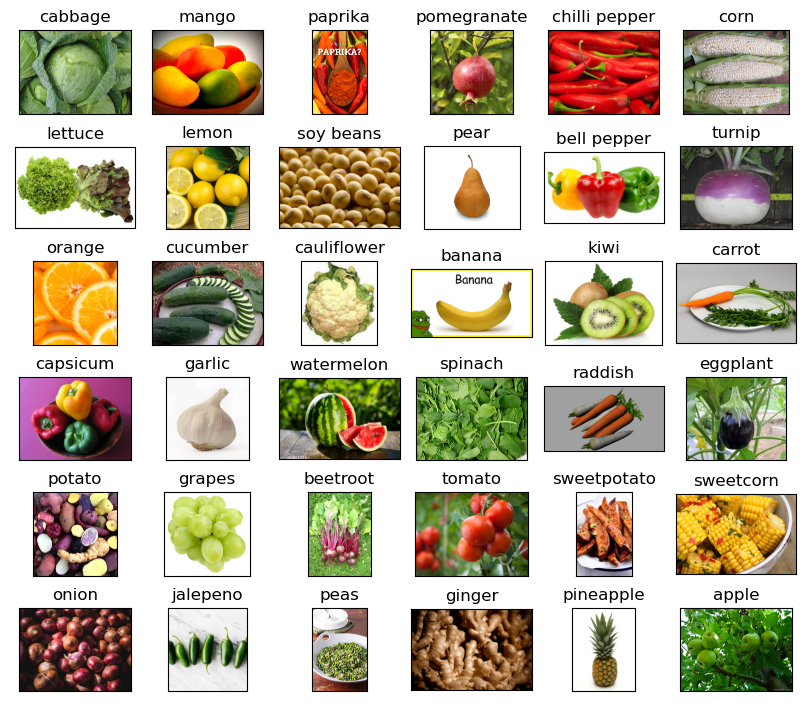

In [9]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [10]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [11]:
# Convert 'Filepath' column to strings
train_df['Filepath'] = train_df['Filepath'].astype(str)

# Create the train generator
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 2855 validated image filenames belonging to 36 classes.


In [12]:
val_df['Filepath'] = val_df['Filepath'].astype(str)

val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [13]:
test_df['Filepath'] = test_df['Filepath'].astype(str)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [14]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [15]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
90/90 [==============================] - 326s 4s/step - loss: 1.7644 - accuracy: 0.5342 - val_loss: 0.4467 - val_accuracy: 0.8265
Epoch 2/5
90/90 [==============================] - 302s 3s/step - loss: 0.5704 - accuracy: 0.8203 - val_loss: 0.2660 - val_accuracy: 0.9265
Epoch 3/5
90/90 [==============================] - 297s 3s/step - loss: 0.3451 - accuracy: 0.8879 - val_loss: 0.2234 - val_accuracy: 0.9353
Epoch 4/5
90/90 [==============================] - 295s 3s/step - loss: 0.2331 - accuracy: 0.9303 - val_loss: 0.1764 - val_accuracy: 0.9441
Epoch 5/5
90/90 [==============================] - 290s 3s/step - loss: 0.1472 - accuracy: 0.9573 - val_loss: 0.1969 - val_accuracy: 0.9471


In [16]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 41s 4s/step


['pineapple',
 'orange',
 'sweetcorn',
 'peas',
 'sweetcorn',
 'spinach',
 'pear',
 'pineapple',
 'orange',
 'tomato',
 'cauliflower',
 'kiwi',
 'onion',
 'raddish',
 'peas',
 'bell pepper',
 'lemon',
 'pomegranate',
 'potato',
 'paprika',
 'garlic',
 'garlic',
 'jalepeno',
 'paprika',
 'kiwi',
 'beetroot',
 'sweetcorn',
 'garlic',
 'watermelon',
 'pear',
 'carrot',
 'sweetpotato',
 'orange',
 'soy beans',
 'raddish',
 'onion',
 'cucumber',
 'apple',
 'pineapple',
 'pomegranate',
 'pineapple',
 'garlic',
 'capsicum',
 'sweetcorn',
 'carrot',
 'carrot',
 'pomegranate',
 'sweetpotato',
 'grapes',
 'ginger',
 'garlic',
 'watermelon',
 'cauliflower',
 'lettuce',
 'beetroot',
 'spinach',
 'cabbage',
 'sweetcorn',
 'kiwi',
 'onion',
 'tomato',
 'paprika',
 'chilli pepper',
 'cauliflower',
 'tomato',
 'onion',
 'capsicum',
 'pomegranate',
 'cauliflower',
 'sweetcorn',
 'watermelon',
 'turnip',
 'bell pepper',
 'soy beans',
 'soy beans',
 'banana',
 'mango',
 'orange',
 'mango',
 'tomato',
 'a

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [18]:
img = output('fruit/test/cabbage/Image_1.jpg')
img

1/1 [==============================] - 2s 2s/step


'cabbage'